<a href="https://colab.research.google.com/github/z3193631/NLP_Demo/blob/master/Multiclass_standard_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words Approach and Logistic Regression for NLP

In [0]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score

In [0]:
train = pd.read_csv('train_sample.csv')
vals = pd.read_csv('val_sample.csv')
test = pd.read_csv('test.csv.zip')
test_label = pd.read_csv('test_labels.csv.zip')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
join_test = pd.merge(test,test_label, how='inner')
final_test = join_test[join_test.ne(-1).all(axis=1)]

In [12]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(385.188, 579.9463720469764, 5000)

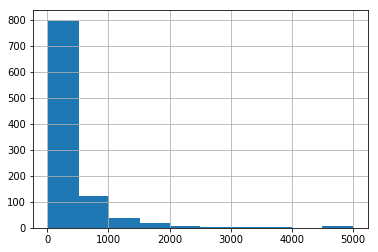

In [13]:
lens.hist()

In [14]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.092000,0.01200,0.048000,0.005000,0.048000,0.010000,0.902000
std,0.289171,0.10894,0.213873,0.070569,0.213873,0.099549,0.297463
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
len(train),len(test)

(1000, 153164)

In [0]:
#making sure column is not empty
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

## Model Building

In [0]:
##create ngrams
# import re, string
# re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

# def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [0]:
# #This creates a sparse matrix with only a small number of non-zero elements (stored elements in the representation below).
# n = train.shape[0]
# vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
#                min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
#                smooth_idf=1, sublinear_tf=1 )
# trn_term_doc = vec.fit_transform(train[COMMENT])
# test_term_doc = vec.transform(test[COMMENT])

# trn_term_doc, test_term_doc

In [0]:
# #naive bayes formula
# def pr(y_i, y):
#     p = x[y==y_i].sum(0)
#     return (p+1) / ((y==y_i).sum()+1)

In [0]:
# x = trn_term_doc
# test_x = test_term_doc

In [0]:
# #abstraction for the model steps

# def get_mdl(y):
#     y = y.values
#     r = np.log(pr(1,y) / pr(0,y))
#     m = LogisticRegression(C=4, dual=True)
#     x_nb = x.multiply(r)
#     return m.fit(x_nb, y), r
  
# #fit one model for each dependent variable
# preds = np.zeros((len(test), len(label_cols)))

# for i, j in enumerate(label_cols):
#     print('fit', j)
#     m,r = get_mdl(train[j])
#     preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]
    
#     pred_test = m.predict_proba(test_x.multiply(r))[:,1]
#     print('ROC AUC:', roc_auc_score(test_label[j], pred_test))
#     loss.append(roc_auc_score(test_label[j], pred_test))

In [0]:
# df = pd.concat([train['comment_text'], vals['comment_text']], axis=0)
# df = df.fillna("unknown")

# nrow_train = train.shape[0]

# vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
# X = vectorizer.fit_transform(df)

# col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# preds = np.zeros((train.shape[0], len(col)))

In [0]:
df = train['comment_text']
df = df.fillna("unknown")

nrow_train = train.shape[0]

vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
X = vectorizer.fit_transform(df)

col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

preds = np.zeros((train.shape[0], len(col)))

In [26]:
loss = []

Y = vectorizer.transform(final_test['comment_text']) #for test dataset validation

for i, j in enumerate(col):
    print('===Fit '+j)
    model = LogisticRegression(penalty='l2')
    model.fit(X, train[j])
    preds[:,i] = model.predict_proba(X)[:,1]
    
    pred_train = model.predict_proba(X)[:,1]
    pred_test = model.predict_proba(Y)[:,1]
    print('ROC AUC:', roc_auc_score(final_test[j], pred_test))
    loss.append(roc_auc_score(final_test[j], pred_test))
    
print('mean column-wise ROC AUC:', np.mean(loss))

===Fit toxic
ROC AUC: 0.8976874019679926
===Fit severe_toxic
ROC AUC: 0.9489800853167608
===Fit obscene
ROC AUC: 0.9236615106993161
===Fit threat
ROC AUC: 0.9246947770530405


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


===Fit insult
ROC AUC: 0.8918130552450203
===Fit identity_hate
ROC AUC: 0.8867149052671137
mean column-wise ROC AUC: 0.9122586225915406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
